# План симуляций
0. Превышение критической энергии, условие  возникновения лавины.
1. Симуляции паратметров электронной лавины без учета гамма-квантов
2. Расчет длинны нарастания лавины для разных высот и полей (делая поправку для поля на высоту)
3. Расчет средней энергии электронов, спектра электронов, зависимости от начальной энергии




In [4]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl

In [2]:
path = "/home/zelenyy/data/thunderstorm/test/result.hdf5"
# path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/result.hdf5"

In [8]:
with tables.open_file(path) as h5file:
    # print(h5file)
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        # print(table.nrows)
        print(repr(table.attrs))
        # data = table.read()
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 32 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 8397,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml .././gdml/0.gdml\n/npm/thunderstorm/physics standard_opt_4\n/npm/thunderstorm/minimal_energy 0.10220286877494192 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma false\n/npm/thunderstorm/stacking/save_gamma false\n/npm/th

In [ ]:
bins = np.arange(0.001, 2, 0.001)


In [4]:
@dataclass
class CEData:
    number : int
    energy : float
    hist : np.ndarray

def select_data(table, field, height):
    m_field = table.attrs["values_gdml_field"][0]
    m_height = table.attrs["values_gdml_height"][0]
    return np.isclose([m_field, m_height], [field, height]).all()

def get_data(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(0.001, 2, 0.001)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                hist, _ = np.histogram(data["energy"], bins=bins)
                result.append(CEData(number, energy, hist))
    return result, bins

In [9]:
ce_list, bins = get_data(path, field=0.00030000000000000003)

In [10]:
ce_list = sorted(ce_list, key=lambda x: x.energy)

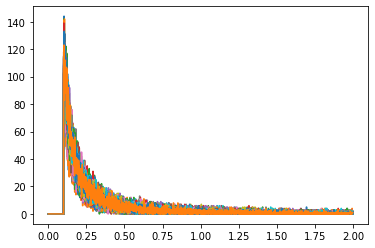

In [11]:
for item in ce_list:
    plt.step(bins[:-1], item.hist)

In [12]:
for item in ce_list:
    print(item.hist.sum()/item.number, ce_list.index(item))

79.86 0
68.07 1
89.99 2
100.51 3
96.18 4
98.94 5
88.9 6
101.45 7
106.35 8
103.53 9
107.26 10
101.54 11
106.77 12
114.34 13
107.86 14
114.07 15
109.81 16
115.8 17
106.98 18
111.38 19
116.74 20
114.67 21
115.76 22
114.34 23
114.95 24
117.02 25
113.99 26
111.22 27
116.27 28
120.65 29
120.5 30
117.07 31
117.5 32
119.6 33
116.36 34
117.33 35
118.43 36
115.26 37
117.67 38
116.91 39
118.5 40
119.42 41
118.51 42
120.45 43
118.5 44
120.67 45
119.03 46
116.21 47
117.93 48
116.74 49
119.45 50
119.29 51
117.85 52
114.88 53
118.65 54
115.35 55
116.93 56
118.76 57
115.05 58
119.03 59
119.02 60
117.2 61


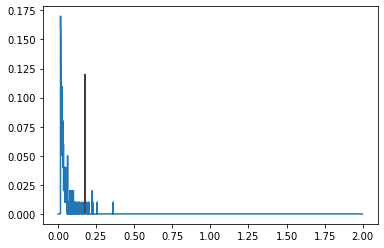

In [65]:
item = ce_list[-1]
n = 100
plt.step(bins[:-1], item.hist/item.number)
plt.vlines(item.energy, 0, 0.12)

In [3]:
def get_data_event(path, field = 0.0, height = 0.0):
    result = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                _, temp  = np.unique(data["event"], return_counts=True)
                result.append(CEData(number, energy, temp))
    return result

In [11]:
event_list = get_data_event(path, field=9e-4)

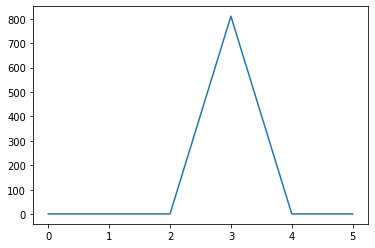

In [14]:
item = event_list[28]
plt.plot(item.hist)

In [13]:
def get_data_z(path, field = 0.0, height = 0.0):
    result = []
    bins = np.arange(-500.0, 501, 1)
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            if select_data(table, field, height):
                data = table.read()
                energy =  table.attrs["values_macros_energy"]
                number =  table.attrs["values_macros_number"]
                temp, _ = np.histogram(data["z"], bins=bins)
                temp = np.cumsum(temp)
                result.append(CEData(number, energy, temp))
    return result

In [17]:
z_list = get_data_z(path, field=11e-4)


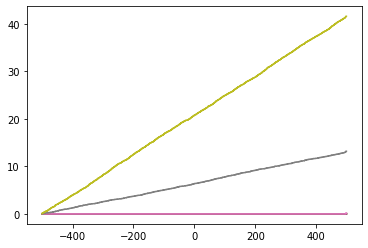

In [18]:
bins = np.arange(-500.0, 501, 1)
for item in z_list:
    plt.step(bins[:-1], item.hist/item.number)

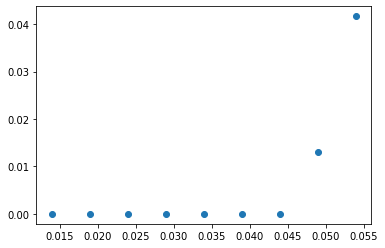

In [19]:
from scipy.linalg import lstsq

bins = np.arange(-500.0, 501, 1)
energy = []
k = []
for item in z_list:
    x = bins[:-1]
    y = item.hist/item.number
    M = x[:, np.newaxis]**[0, 1]
    p, res, rnk, s = lstsq(M, y)
    energy.append(item.energy)
    k.append(p[1])
plt.plot(energy, k, "o")

# Critical result post process

In [36]:
# path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/critical_energy.npy"
path = "/mnt/storage2/phd/data/thunderstorm/critical_energy/critical_energy_up.npy"
#

In [13]:
data = np.load(path)

In [14]:
data["chi2"] /= 1000

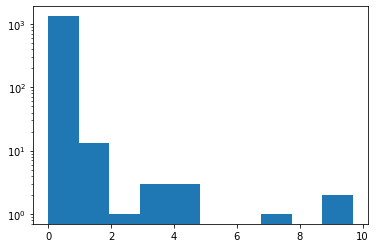

In [29]:
chi2 = data["chi2"]
indx1 = data["k"] > 0.001
indx2 =  chi2 < 10
indx = np.logical_and(indx1, indx2)
plt.hist(chi2[indx])
plt.yscale("log")

In [31]:
for item in data[np.logical_not(indx)]:
    print(item)

(0.0003, 0., 0.20440574, 0., 0., 0.)
(0.0003, 0., 0.20940574, 0., 0., 0.)
(0.0003, 0., 0.21440574, 0., 0., 0.)
(0.0003, 0., 0.21940574, 0., 0., 0.)
(0.0003, 0., 0.22440574, 0., 0., 0.)
(0.0003, 0., 0.22940574, 0., 0., 0.)
(0.0003, 0., 0.23440574, 0., 0., 0.)
(0.0003, 0., 0.23940574, 0., 0., 0.)
(0.0003, 0., 0.24440574, 0., 0., 0.)
(0.0003, 0., 0.24940574, 0., 0., 0.)
(0.0003, 0., 0.25440574, 0., 0., 0.)
(0.0003, 0., 0.25940574, 0., 0., 0.)
(0.0003, 0., 0.26440574, 0., 0., 0.)
(0.0003, 0., 0.26940574, 0., 0., 0.)
(0.0003, 0., 0.27440574, 0., 0., 0.)
(0.0003, 0., 0.27940574, 0., 0., 0.)
(0.0003, 0., 0.28440574, 0., 0., 0.)
(0.0003, 0., 0.28940574, 0., 0., 0.)
(0.0003, 0., 0.29440574, 3.11566332e-05, 0.01415858, 10.60907863)
(0.0003, 0., 0.29940574, 0., 0., 0.)
(0.0003, 0., 0.30440574, 1.40544141e-07, 0.00097607, 0.02627319)
(0.0003, 0., 0.30940574, 0., 0., 0.)
(0.0003, 0., 0.31440574, 0., 0., 0.)
(0.0003, 0., 0.31940574, 0., 0., 0.)
(0.0003, 0., 0.32440574, 0., 0., 0.)
(0.0003, 0., 0.329

In [4]:
indx = np.logical_and(data["height"] == 5000.0, np.ma.masked_values(data["field"], 6.33333333e-04).mask)

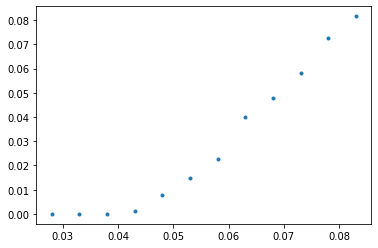

In [5]:
plt.plot(data["energy"][indx], data["k"][indx], ".")

In [7]:
x = data["energy"][indx]
y =  data["k"][indx]


In [62]:
def get_critical_energy(path):
    data = np.load(path)
    result = []
    dtype=np.dtype([("height", 'd'), ("field", "d"), ("critical_energy", "d"),
                    ("rate", "d"), ("chi2", "d"), ("coverage", np.bool_)])
    hf = np.unique(data[["height", "field"]], axis=0)
    for item in hf:
        height, field = item
        indx = np.logical_and(data["height"] == height, data["field"] == field)
        x = data["energy"][indx]
        y =  data["k"][indx]
        chi2 = data["chi2"][indx]
        indx_x = np.argsort(x)
        x = x[indx_x]
        y = y[indx_x]
        chi2 = chi2[indx_x]
        indx = y > 0.001
        if np.all(np.logical_not(indx)):
            ce = x[-1]
            chi2_x = chi2[-1]
            k = y[-1]
            coverage = False
        elif np.all(indx):
            ce = x[0]
            chi2_x = chi2[0]
            k = y[0]
            coverage = False
        else:
            indx = indx.argmax()
            ce = x[indx]
            chi2_x = chi2[indx]
            k = y[indx]
            coverage = True
        result.append((height, field, ce, k, chi2_x, coverage))
    return np.array(result, dtype=dtype)


0.0 0.00030000000000000003 0.0006439372519372518 35.52460097332657
1000.0 0.0002 0.0 0.0
2000.0 0.0002 3.5942435942435997e-07 79.64450841244187
3000.0 0.0002 0.00017908649908649908 68.31415518846498
4000.0 0.00017777777777777779 0.00020835656835656842 60.05606967404257
5000.0 0.00016666666666666666 0.0004235962775962774 43.512866333260135
6000.0 0.00015555555555555556 0.000855464763464763 653.6565517353341
7000.0 0.0001 0.0 0.0
8000.0 0.0001 1.426075426075426e-06 663.342507803378
9000.0 8.888888888888889e-05 1.9107619107619113e-06 285.7954756750762
10000.0 8.888888888888889e-05 4.412720612720611e-05 72.48969538556977
11000.0 6.666666666666667e-05 0.0 0.0
11000.0 0.0001 0.0005900179820179818 156.11837570920486
12000.0 6.666666666666667e-05 0.0 0.0
12000.0 0.0001 0.0009009694809694808 26.668116148509743
13000.0 4.4444444444444447e-05 0.0 0.0
13000.0 6.666666666666667e-05 2.2487422487422548e-07 44.940358933951565
13000.0 8.888888888888889e-05 0.00036090085890085917 29.247581951712977
1400

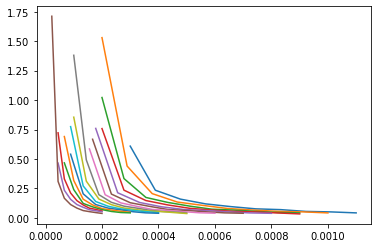

In [63]:
result = get_critical_energy(path)
heights = np.unique(result["height"])
for height in heights:
    indx = result["height"] == height
    x = result["field"][indx]
    y = result["critical_energy"][indx]
    for item in result[indx]:
        if not item["coverage"]:
            print(item["height"], item["field"], item["rate"], item["chi2"])
    plt.plot(x,y)

0.0 0.00030000000000000003
0.0 0.0003888888888888889
0.0 0.0004777777777777778
0.0 0.0005666666666666666
0.0 0.0006555555555555556
0.0 0.0007444444444444445
0.0 0.0008333333333333333
0.0 0.0009222222222222222
0.0 0.001011111111111111
0.0 0.0011
1000.0 0.0002888888888888889
1000.0 0.00037777777777777777
1000.0 0.0004666666666666666
1000.0 0.0005555555555555556
1000.0 0.0006444444444444444
1000.0 0.0007333333333333333
1000.0 0.0008222222222222222
1000.0 0.0009111111111111111
1000.0 0.001
2000.0 0.0002777777777777778
2000.0 0.00035555555555555557
2000.0 0.0004333333333333334
2000.0 0.0005111111111111111
2000.0 0.0005888888888888889
2000.0 0.0006666666666666668
2000.0 0.0007444444444444445
2000.0 0.0008222222222222222
2000.0 0.0009000000000000001
3000.0 0.0002
3000.0 0.0002777777777777778
3000.0 0.00035555555555555557
3000.0 0.0004333333333333334
3000.0 0.0005111111111111111
3000.0 0.0005888888888888889
3000.0 0.0006666666666666668
3000.0 0.0007444444444444445
3000.0 0.0008222222222222222


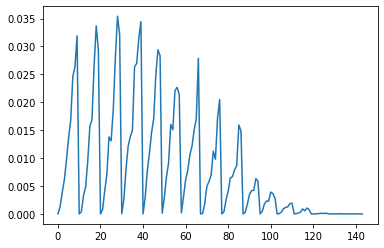

In [8]:
k_based = []
for item in fh:
    height, field = item
    indx = np.logical_and(data["height"] == height, data["field"] == field)
    x = data["energy"][indx]
    y =  data["k"][indx]

    ce = x.min()*2
    indx_x = np.argsort(x)
    x = x[indx_x]
    y = y[indx_x]
    k = y[np.ma.masked_greater_equal(x, ce).mask][0]
    k_based.append(k)
    if k!=0.0:
        print(height, field)
plt.plot(k_based)

# Минимальное поле для убегания

In [6]:
path = "/home/zelenyy/data/thunderstorm/test/result.hdf5"

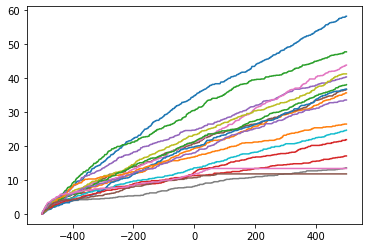

In [10]:
bins = np.arange(-500.0, 501, 1)
with tables.open_file(path) as h5file:
    # print(h5file)
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        data = table.read()
        m_field = table.attrs["values_gdml_field"][0]
        m_height = table.attrs["values_gdml_height"][0]
        number =  table.attrs["values_macros_number"]
        temp, _ = np.histogram(data["z"], bins=bins)
        temp = np.cumsum(temp[::-1])/number

        plt.plot(bins[:-1], temp)

In [12]:
bins = np.arange(-500.0, 501, 1)
with tables.open_file(path) as h5file:
    result = []
    for group in h5file.root:
        # print(group._v_name)
        table = h5file.get_node(group, "stacking_simple")
        data = table.read()
        field = table.attrs["values_gdml_field"][0]
        height = table.attrs["values_gdml_height"][0]
        number =  table.attrs["values_macros_number"]
        ce = table.attrs["values_macros_min_energy"]
        result.append((height, field, table.nrows/number, ce))
    result.sort(key=lambda x: x[1])

for item in result:
    print(*item)

0.0 0.00020470466951619406 60.3 0.10220286877494192
0.0 0.0002108458096016799 37.7 0.10220286877494192
0.0 0.0002169869496871657 49.6 0.10220286877494192
0.0 0.00022312808977265153 17.7 0.10220286877494192
0.0 0.00022926922985813737 41.6 0.10220286877494192
0.0 0.0002354103699436232 37.9 0.10220286877494192
0.0 0.00024155151002910904 45.6 0.10220286877494192
0.0 0.00024769265011459485 13.7 0.10220286877494192
0.0 0.0002538337902000807 42.5 0.10220286877494192
0.0 0.0002599749302855665 25.8 0.10220286877494192
0.0 0.00026611607037105235 38.6 0.10220286877494192
0.0 0.0002722572104565382 27.4 0.10220286877494192
0.0 0.000278398350542024 40.6 0.10220286877494192
0.0 0.00028453949062750986 22.3 0.10220286877494192
0.0 0.0002906806307129957 34.8 0.10220286877494192
0.0 0.0002968217707984815 11.8 0.10220286877494192
0.0 0.0003029629108839673 13.4 0.0625584577292022


In [ ]:
import tables
path = "./result.hdf5"

with tables.open_file(path) as h5file:
    # result = []
    for group in h5file.root:
        table = h5file.get_node(group, "stacking_simple")
        field = table.attrs["values_gdml_field"][0]
        height = table.attrs["values_gdml_height"][0]
        nrows = table.nrows
        if nrows>0:
            print("{:.5f} {:.5f} {}".format(height, field, nrows))
